In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import collections

In [2]:
planets_train = pd.read_csv("C:/Users/user/.jupyter/주피터 파일/data/planets_train.csv")
planets_test = pd.read_csv("C:/Users/user/.jupyter/주피터 파일/data/planets_test.csv")

planets_train.drop(['Unnamed: 0'], axis = 1, inplace = True)
planets_test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
train_x = planets_train.iloc[:, 1:6]
train_y = planets_train.iloc[:, 0]

test_x = planets_test.iloc[:, 1:6]
test_y = planets_test.iloc[:, 0]

In [4]:
train_y = train_y.where((train_y == 'Radial Velocity') | (train_y == 'Transit'), 'Others')
test_y = test_y.where((test_y == 'Radial Velocity') | (test_y == 'Transit'), 'Others')

In [ ]:
planets_train1 = planets_train1.interpolate()
planets_test1 = planets_test1.interpolate()

In [5]:
planets_train1 = pd.concat([train_x,train_y],axis=1)

planets_test1 = pd.concat([test_x,test_y],axis=1)

In [6]:
planets_train1[['orbital_period', 'distance', 'mass']] = np.log(planets_train1[['orbital_period', 'distance', 'mass']])
planets_test1[['orbital_period', 'distance', 'mass']] = np.log(planets_test1[['orbital_period', 'distance', 'mass']])

In [ ]:
c = train_x.columns.tolist()

for e in c:
  sns.displot(data = planets_train1, x = e, hue = 'method', kind = 'kde')

In [ ]:
c = train_x.columns.tolist()

for e in c:
  sns.displot(data = planets_test1, x = e, hue = 'method', kind = 'kde')

In [ ]:
sns.boxplot(data = planets_train1, x = 'distance', y = 'method')

In [ ]:
sns.boxplot(data = planets_train1, x = 'orbital_period', y = 'method')

In [ ]:
sns.boxplot(data = planets_train1, x = 'mass', y = 'method')

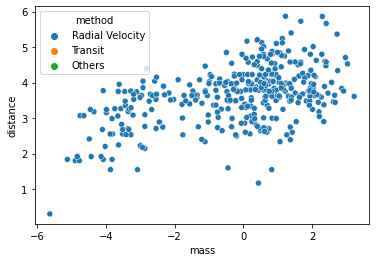

In [41]:
g =sns.scatterplot(data = planets_train1, x = 'orbital_period', y = 'distance', hue = 'method', sizes = (10,200))

g.set_xlim([-3, 14])
g.set_ylim([0, 10])

(0.0, 10.0)

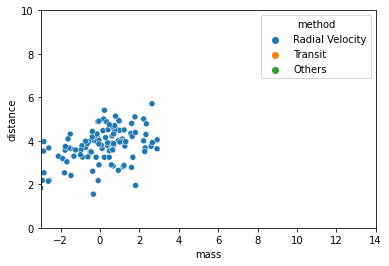

In [40]:
g = sns.scatterplot(data = planets_test1, x = 'orbital_period', y = 'distance', hue = 'method', sizes = (10,200))

g.set_xlim([-3, 14])
g.set_ylim([0, 10])

C:\Users\user\AppData\Local\Temp/ipykernel_4368/327806351.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df1, dtype=np.bool)


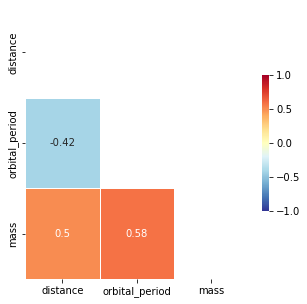

In [7]:
df1 = planets_train1[['distance', 'orbital_period', 'mass']].corr()
#df = planets_train.corr()

fig, ax = plt.subplots( figsize=(5,5) )

mask = np.zeros_like(df1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df1, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_4368/1315431000.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df2, dtype=np.bool)


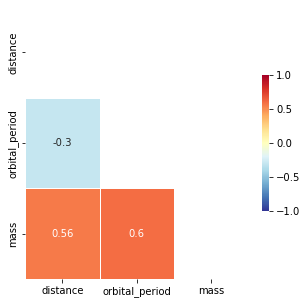

In [8]:
df2 = planets_test1[['distance', 'orbital_period', 'mass']].corr()
#df = planets_train.corr()

fig, ax = plt.subplots( figsize=(5,5) )

mask = np.zeros_like(df2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df2, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

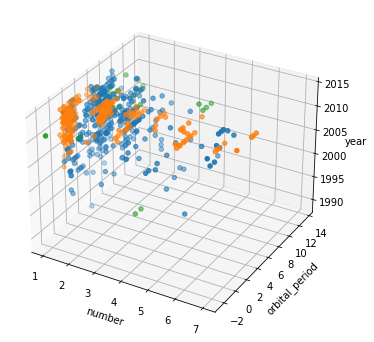

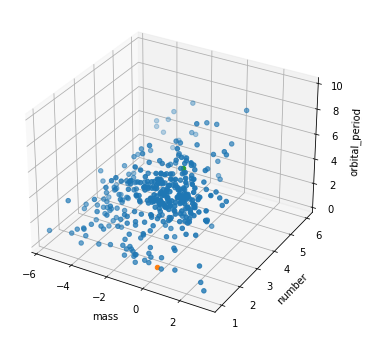

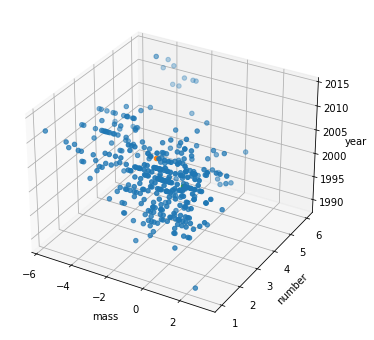

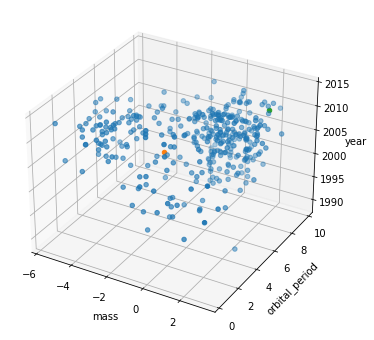

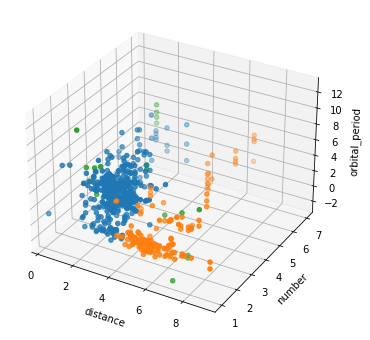

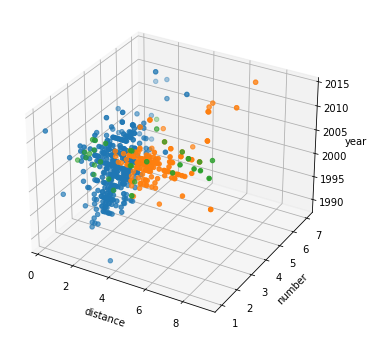

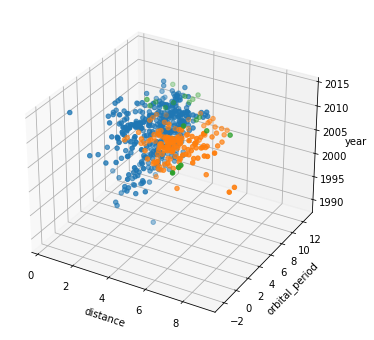

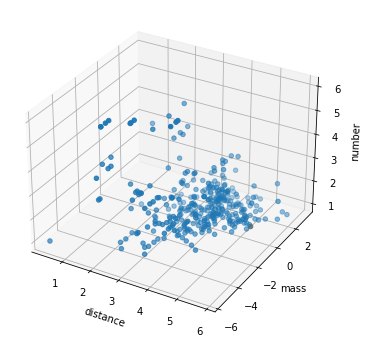

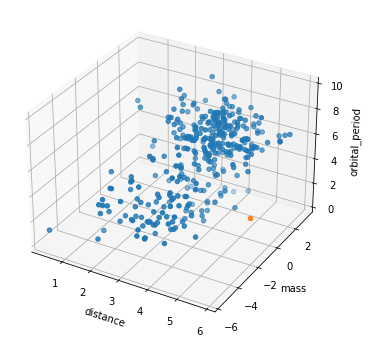

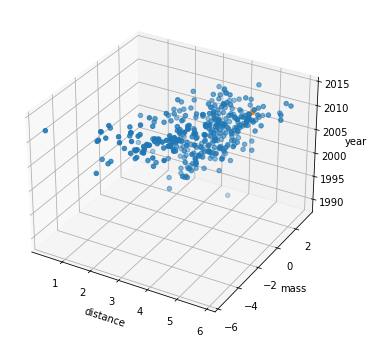

In [32]:
from mpl_toolkits.mplot3d import Axes3D

c = train_x.columns.tolist()
s1 = pd.unique(planets_train1['method'])

for e1 in c :
    for e2 in c :
        for e3 in c :
            if (e1 < e2) and (e2 < e3) :
                fig = plt.figure(figsize=(8,6))
                ax = fig.add_subplot(111, projection = '3d')
                for d in s1 :
                    tmp = planets_train1[planets_train1['method']==d]
                    ax.scatter(tmp[e1], tmp[e2], tmp[e3])
                    ax.set_xlabel(e1)
                    ax.set_ylabel(e2)
                    ax.set_zlabel(e3)
                plt.show()

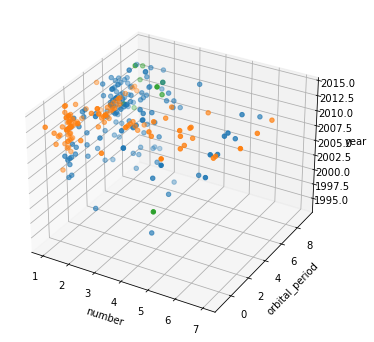

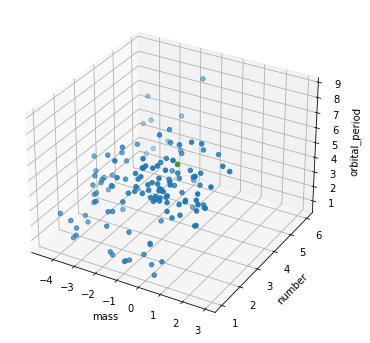

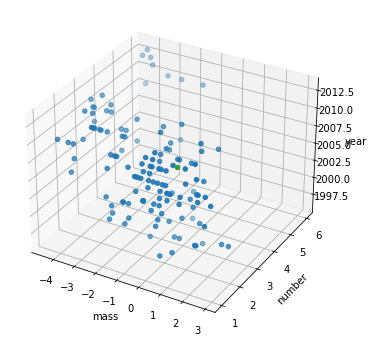

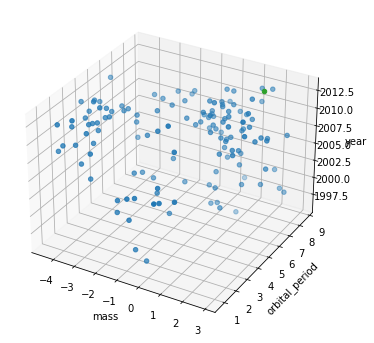

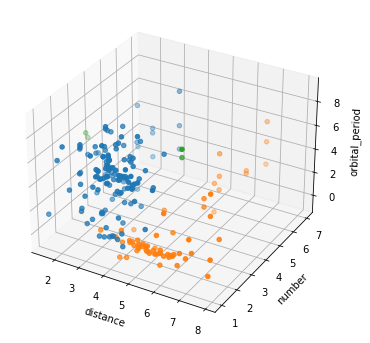

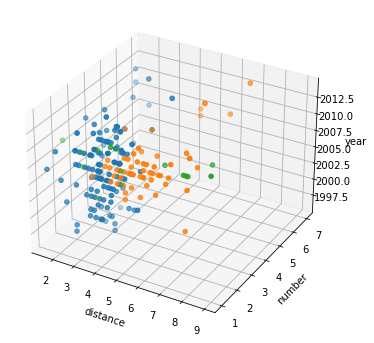

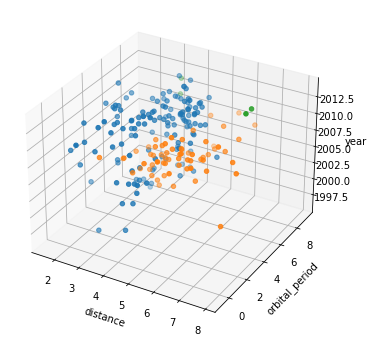

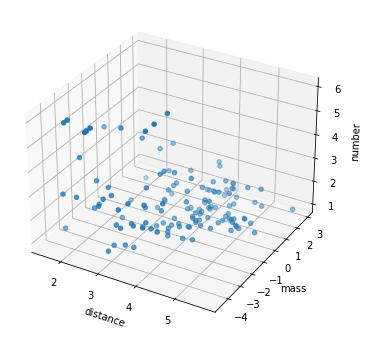

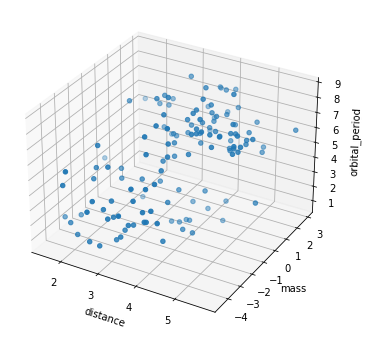

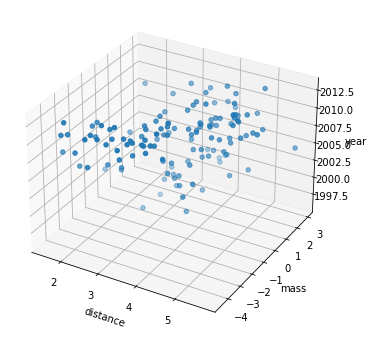

In [34]:
from mpl_toolkits.mplot3d import Axes3D

s2 = pd.unique(planets_test1['method'])

for e1 in c :
    for e2 in c :
        for e3 in c :
            if (e1 < e2) and (e2 < e3) :
                fig = plt.figure(figsize=(8,6))
                ax = fig.add_subplot(111, projection = '3d')
                for d in s2 :
                    
                    tmp = planets_test1[planets_test1['method']==d]
                    ax.scatter(tmp[e1], tmp[e2], tmp[e3])
                    ax.set_xlabel(e1)
                    ax.set_ylabel(e2)
                    ax.set_zlabel(e3)
                plt.show()